In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings('ignore')

#maximize the visualization of columns
pd.set_option('display.max_columns',999)

# DATASET - A real online retail transaction data set (2010-2011)

<a href="https://archive.ics.uci.edu/dataset/502/online+retail+ii">https://archive.ics.uci.edu/dataset/502/online+retail+ii

In [93]:
df = pd.read_excel('online_retail_II.xlsx')
df.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


## Dataset info and Descriptive Analysis

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [95]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


<p>We can take some interesting facts from here:</p>
<ul>
    <li>The minimum quantity is -9600,a big negative number, which kinda doesn't make sense;</li>
    <li>The minimum price is also negative, -52594. What could this mean?We gotta pay attention to this;</li>
    <li>The costumer ID count is less than the others since it has some missing values, we'll have to take care of this too.</li>
</ul>

In [96]:
df.describe(include='O') #descriptive analysis of categorical data

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


## Cleaning the Dataset

In [97]:
na_customers=df[df['Customer ID'].isna()]
na_customers

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.00,NaN,United Kingdom
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.00,NaN,United Kingdom
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.00,NaN,United Kingdom


In [98]:
len(na_customers[na_customers['Quantity']<0])

2487

<p>All of these occurrences are transactions where the customer ID is non-existent. We can't use it in our analysis. Also, we can see a huge amount of negative numbers in the <b>Quantity</b> column, 2487 to be more exact, which can make our task more difficult. So, for the sake of our analysis, we'll remove all these NAN customers IDs.</p>

In [99]:
df.dropna(subset=['Customer ID'],inplace=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


<p>With our dataset cleaned of nan costumer IDs, now we gonna look at negative values on <b>Quantity</b> (in general) Column</p>

In [100]:
df=df[df['Quantity']>=0]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


<p>Okay, with our clean dataset, lets take another look on descriptive analysis</p>

In [101]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407695.000000,407695,407695.000000,407695.000000
mean,13.586686,2010-07-01 10:10:10.782177792,3.294188,15368.504107
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000
50%,5.000000,2010-07-09 15:46:00,1.950000,15321.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,96.842229,NaN,34.756655,1679.795700


In [102]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,407695,407695,407695,407695
unique,19215,4017,4444,37
top,500356,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,270,3153,3153,370951


<p>Alright, so no negative numbers this time after our cleaning. Everything looks nice. Lets keep with our analysis.</p>

## Analysing the StockCode Column
<p>On the official dataset website, we have the information about all the variables and it tells that on the <b>StockCode</b> column is composed by 5-digit values only. Lets analyse if its true. </p>

In [103]:
df["StockCode"] = df["StockCode"].astype("str")


df[df["StockCode"].str.match("^\\d{5}$") == False]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


<p>And yes, there are A LOT of stock codes that doesnt obey the 5-digit rule tho, most of them have a capital letter at the end. They all seem legit transactions though. To make our analysis better, it'd be interesting if we could check if theres any other type of weird-looking stock code. For this, we'll again use regex.</p>

In [104]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.0,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.0,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.0,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.0,12533.0,Germany
1244,489557,POST,POSTAGE,4,2009-12-01 12:52:00,18.0,12490.0,France
...,...,...,...,...,...,...,...,...
522954,538002,C2,CARRIAGE,1,2010-12-09 11:48:00,50.0,14932.0,Channel Islands
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.0,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.0,12683.0,France
524491,538093,POST,POSTAGE,5,2010-12-09 14:49:00,18.0,12682.0,France


<p>And, take a look! There more than 1 thousand occurences where the stock code is a weird value, not even close related to 5-digit numbers. What could this mean?</p>

In [105]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]['StockCode'].unique()

array(['POST', 'C2', 'M', 'BANK CHARGES', 'TEST001', 'TEST002', 'PADS',
       'ADJUST', 'D', 'ADJUST2', 'SP1002'], dtype=object)

<p>We found out that there are many stock codes that doesnt go with the 5-digit rule. For the sake of this project, we'll just remove them, as some of them seem also as invalid transactions. But, in a real situation, its important to ask about this and what could this mean, since it can be important and bring us cool insights.</p>

In [106]:
df['StockCode'] = df['StockCode'].astype('str')
mask=(
    (df["StockCode"].str.match("^\\d{5}$") == True) | (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
)

cleaned_df = df[mask] #cleaned dataset
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


<p>Descritive analysis after the cleaning section</p>

In [107]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406323.000000,406323,406323.000000,406323.000000
mean,13.619534,2010-07-01 10:14:46.649094656,2.991565,15373.660913
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.002302,NaN,4.285914,1677.370362


In [108]:
cleaned_df.describe(include='O')

,Invoice,StockCode,Description,Country
count,406323,406323,406323,406323
unique,18966,4006,4432,37
top,500356,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,270,3153,3153,370474


In [109]:
cleaned_df[cleaned_df['Price']==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858.0,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.0,13047.0,United Kingdom


<p>Apparently, these are all transactions where the price is 0, meaning it was a free product or something. In order to not affect our analysis, we will remove these occurences, but depending on the case or the goal, they can be useful. I think it'll be better to remove them, though.</p>

In [110]:
len(cleaned_df[cleaned_df['Price']==0])

28

In [111]:
cleaned_df = cleaned_df[cleaned_df['Price']>0]

In [112]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [113]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406295.000000,406295,406295.000000,406295.000000
mean,13.618359,2010-07-01 10:18:05.997415424,2.991771,15373.750194
min,1.000000,2009-12-01 07:45:00,0.030000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000476,NaN,4.285989,1677.333922


## Feature Engineering

In [114]:
cleaned_df['Transaction_Total'] = cleaned_df['Price'] * cleaned_df['Quantity'] # Total money involved on each transaction

In [115]:
aggregated_df = cleaned_df.groupby(by='Customer ID', as_index=False) \
    .agg(
        Total_Spent = ('Transaction_Total', 'sum'),
        Frequency = ("Invoice", "nunique"),
        Last_Invoice_Date = ("InvoiceDate", "max")
    )

aggregated_df

,Customer ID,Total_Spent,Frequency,Last_Invoice_Date
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00
...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00
4281,18284.0,411.68,1,2010-10-04 11:33:00
4282,18285.0,377.00,1,2010-02-17 10:24:00
4283,18286.0,1246.43,2,2010-08-20 11:57:00


<p>So, here we can see the Total spent by each costumer, their frequency and their last invoice date</p>

In [116]:
most_recent_invoice_date = aggregated_df['Last_Invoice_Date'].max()

aggregated_df['Recency(days)'] = (most_recent_invoice_date - aggregated_df['Last_Invoice_Date']).dt.days #recency in days

aggregated_df

,Customer ID,Total_Spent,Frequency,Last_Invoice_Date,Recency(days)
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17
4281,18284.0,411.68,1,2010-10-04 11:33:00,66
4282,18285.0,377.00,1,2010-02-17 10:24:00,295
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111


## Checking if we have outliers

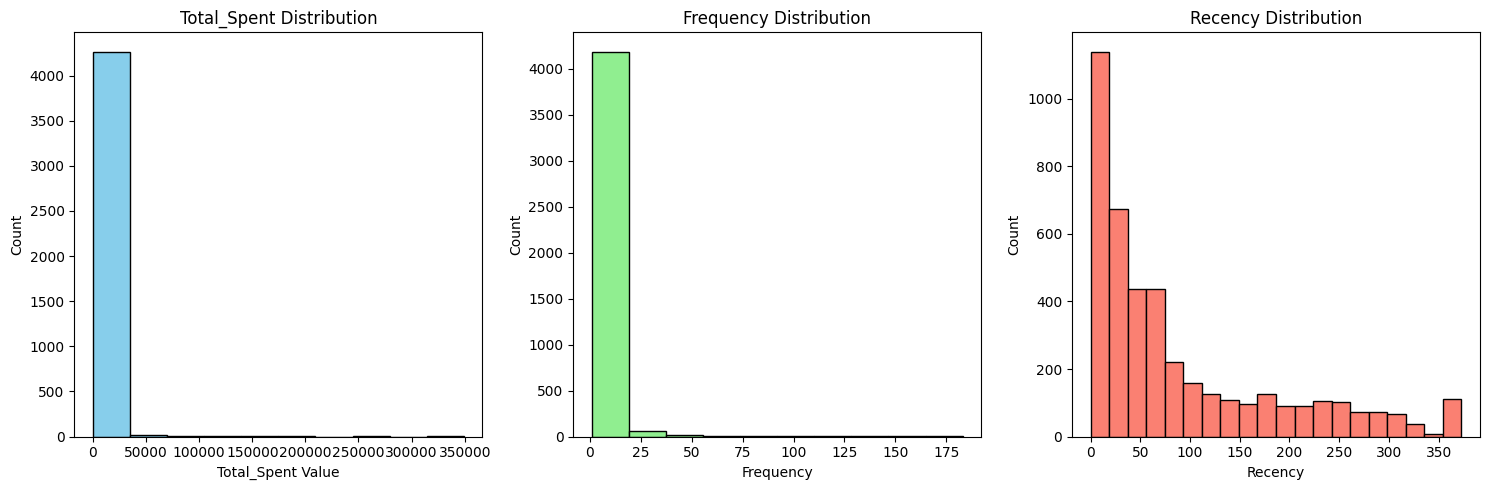

In [117]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['Total_Spent'], bins=10, color='skyblue', edgecolor='black')
plt.title('Total_Spent Distribution')
plt.xlabel('Total_Spent Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency(days)'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


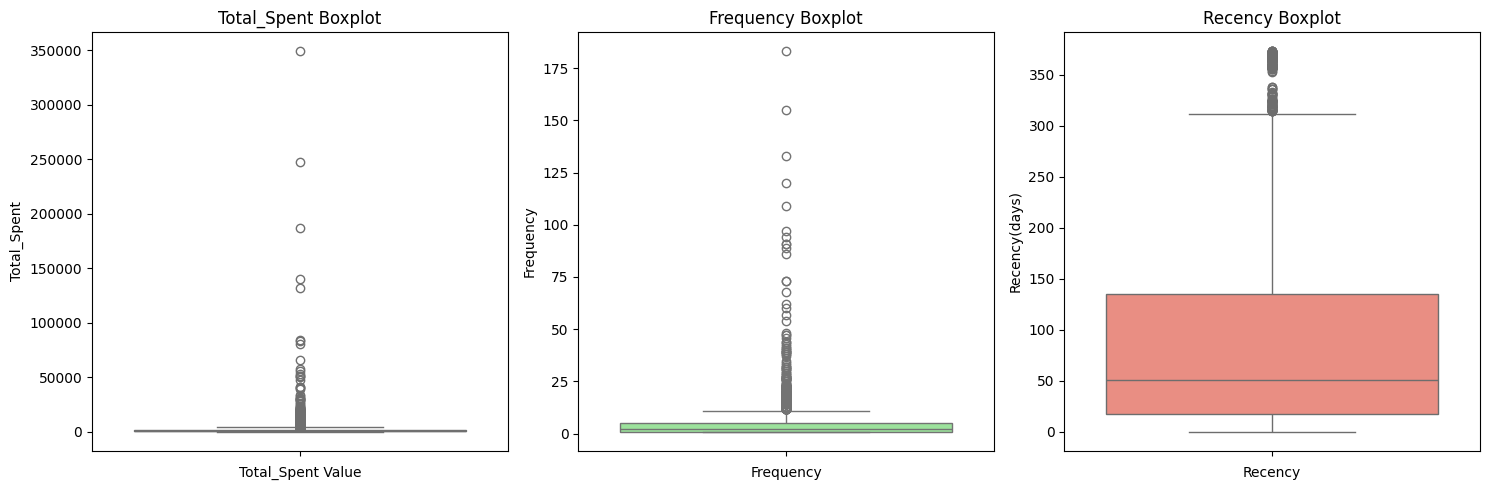

In [118]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['Total_Spent'], color='skyblue')
plt.title('Total_Spent Boxplot')
plt.xlabel('Total_Spent Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency(days)'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

<p>And yes, we have a bunch of them. But we'll ignore our temptation to delete all of them. Why? Well, simply because the total_spent and frequency boxplots tell a lot about the clients and we cant just drop all these values, they will be important for our model to understand their behavior. </p> 

<p>So, we'll divide our dataset between no_outliers_df and outliers_df. </p>

In [119]:
TS_Q1 = aggregated_df['Total_Spent'].quantile(0.25)
TS_Q3 = aggregated_df['Total_Spent'].quantile(0.75)
TS_IQR = TS_Q3 - TS_Q1

Total_Spent_Outliers_df = aggregated_df[(aggregated_df['Total_Spent'] > (TS_Q3 + 1.5*TS_IQR)) | (aggregated_df['Total_Spent'] < (TS_Q1-1.5*TS_IQR))].copy()
Total_Spent_Outliers_df.describe()

,Customer ID,Total_Spent,Frequency,Last_Invoice_Date,Recency(days)
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101726,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851044,19.729755,NaN,51.541004


In [120]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

Frequency_Outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5*F_IQR)) | (aggregated_df['Frequency'] < (F_Q1-1.5*F_IQR))].copy()
Frequency_Outliers_df.describe()

,Customer ID,Total_Spent,Frequency,Last_Invoice_Date,Recency(days)
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714910,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560000,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


<p>Now, that we took a look at our outliers dataframes, lets do the same for the non-outliers ones.</p>

In [121]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(Total_Spent_Outliers_df.index)) & (~aggregated_df.index.isin(Frequency_Outliers_df.index))]
non_outliers_df.describe()

,Customer ID,Total_Spent,Frequency,Last_Invoice_Date,Recency(days)
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502195,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672280,2.243748,NaN,98.111495


<p>Now, lets plot their boxplot to see if there are still outliers.</p>

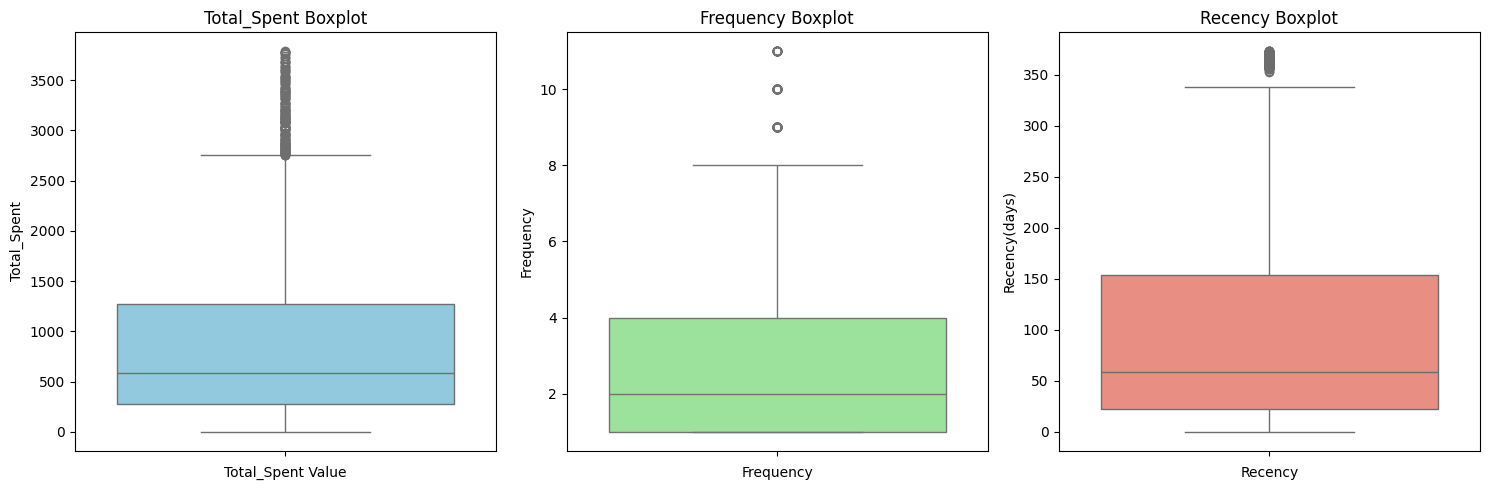

In [122]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['Total_Spent'], color='skyblue')
plt.title('Total_Spent Boxplot')
plt.xlabel('Total_Spent Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency(days)'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

<p>And, as we can see, yes there are still some outliers, but its way better now. Also, the data isnt too much compressed. It's visible that the boxplot stretched a lot. We are happy with that.</p>

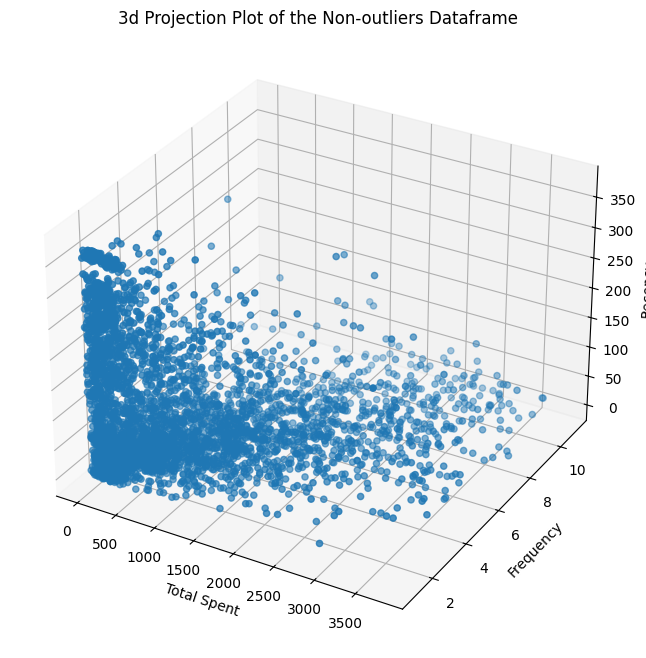

In [123]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')

plot = ax.scatter(non_outliers_df['Total_Spent'], non_outliers_df['Frequency'], non_outliers_df['Recency(days)'])

ax.set_xlabel('Total Spent')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3d Projection Plot of the Non-outliers Dataframe')
plt.show()

<p>Our data are all in different scales. Total_Spent is on the Thousands, Frequency on the tens and recency on the hundreds. This can impact on our clustering algorithm. To solve this, we'll use Scaling to scale our features.</p>

In [124]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["Total_Spent", "Frequency", "Recency(days)"]])

scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=('Total_Spent', 'Frequency', 'Recency(days)'))
scaled_data_df

,Total_Spent,Frequency,Recency(days)
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


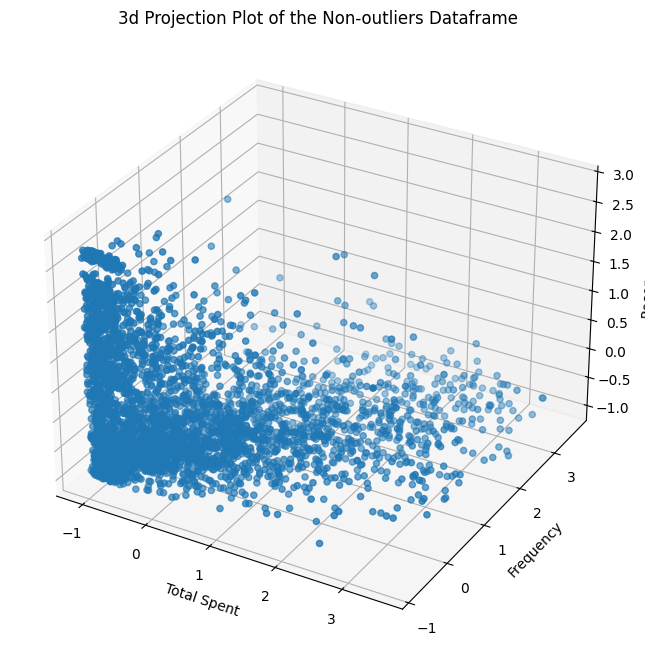

In [125]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')

plot = ax.scatter(scaled_data_df['Total_Spent'], scaled_data_df['Frequency'], scaled_data_df['Recency(days)'])

ax.set_xlabel('Total Spent')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3d Projection Plot of the Non-outliers Dataframe')
plt.show()

<p>Our features are all scaled now and ready to be used by the algorithm.</p>

# Using KMeans to make Clusters

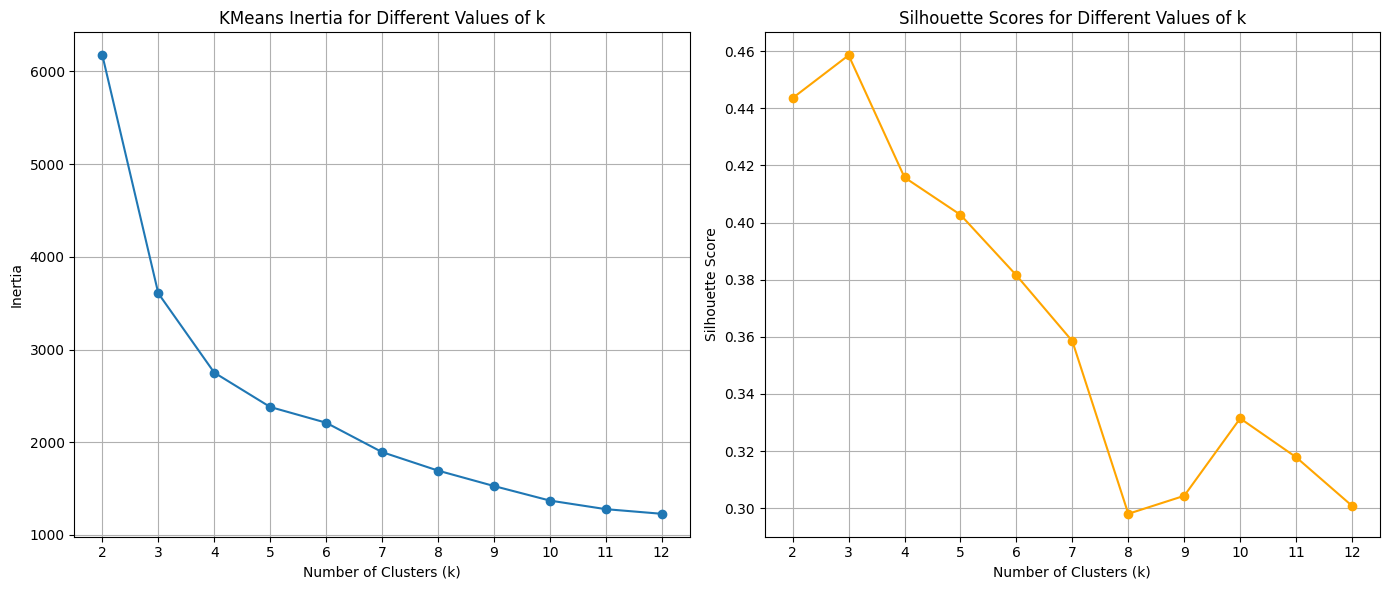

In [126]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [127]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [128]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

,Customer ID,Total_Spent,Frequency,Last_Invoice_Date,Recency(days),Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,0


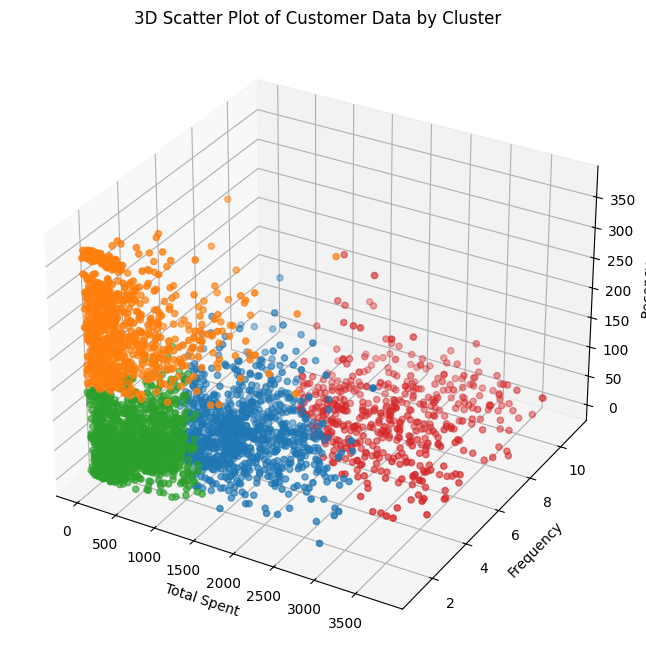

In [129]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['Total_Spent'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency(days)'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Total Spent')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

<p>Now, lets analyse each attribute by cluster using violinplots.</p>

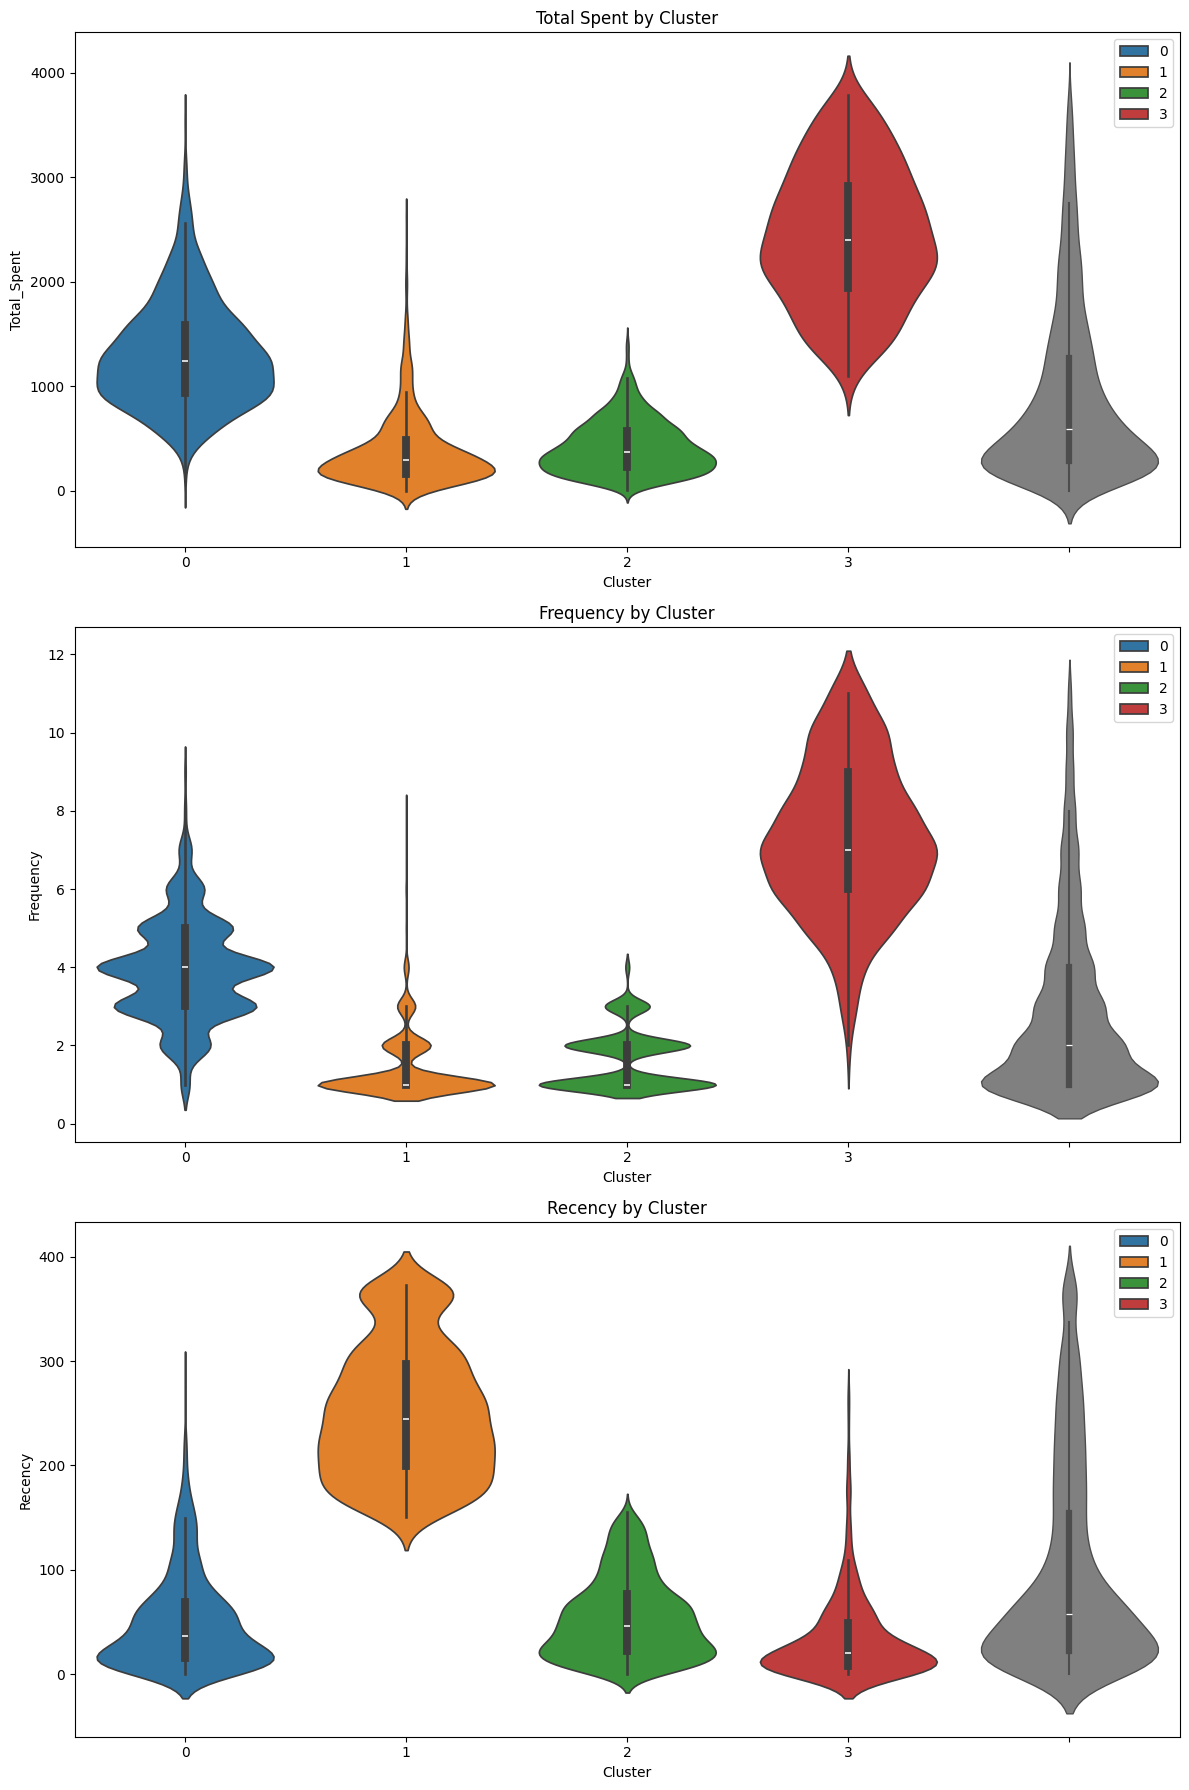

In [130]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Total_Spent'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Total_Spent'], color='gray', linewidth=1.0)
plt.title('Total Spent by Cluster')
plt.ylabel('Total_Spent')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency(days)'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency(days)'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

# Conclusion - Non-outliers df Clusters

<p><b>Cluster 0 (blue):</b> <br>
    Conclusion: The clients on this cluster are clients that buy frequently and are, in good part, good spenders. They are high-valueable clients and its important to keep with their loyalty. Their recency aint always low, though, which means some of them dont purchase very recently. <br>
    Action: Implement loyalty programs, personalized and special offers based on their purchases to retain their loyalty and keep them active. 
</p>

<p><b>Cluster 1 (orange):</b> <br>
    Conclusion: These clients are low-spenders, with low frequency(most made only one transaction) and who havent purchased in a long time. <br>
    Action: Implement discounts, targeted offers and campaigns to encourage them to purchase again.
</p>

<p><b>Cluster 2 (green):</b> <br>
    Conclusion: This cluster shows the least active and lowest-value clients, but they have recent purchases. They are probably new costumers.<br>
    Action: Focus on building relationships with those clients to gain their confidence and giving incentives to keep them as part of the frequent clients. 
</p>

<p><b>Cluster 3 (red):</b> <br>
    Conclusion: This cluster represents your most important, high-value and frequent buyers. Their purchases are mostly recent too. They are your most loyal buyers and building a relationship with them by offering loyalty programs is a must to keep them buying.  <br>
    Action: Focus on offering exclusive loyalty programs to keep their high-valuable loyalty, providing special offers and recognizing their loyalty to keep them satisfied.
</p>


In [131]:
overlap_indices = Total_Spent_Outliers_df.index.intersection(Frequency_Outliers_df.index)

Total_Spent_only_outliers = Total_Spent_Outliers_df.drop(overlap_indices)
frequency_only_outliers = Frequency_Outliers_df.drop(overlap_indices)
Total_Spent_and_frequency_outliers = Total_Spent_Outliers_df.loc[overlap_indices]

Total_Spent_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
Total_Spent_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([Total_Spent_only_outliers, frequency_only_outliers, Total_Spent_and_frequency_outliers])

outlier_clusters_df

,Customer ID,Total_Spent,Frequency,Last_Invoice_Date,Recency(days),Cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


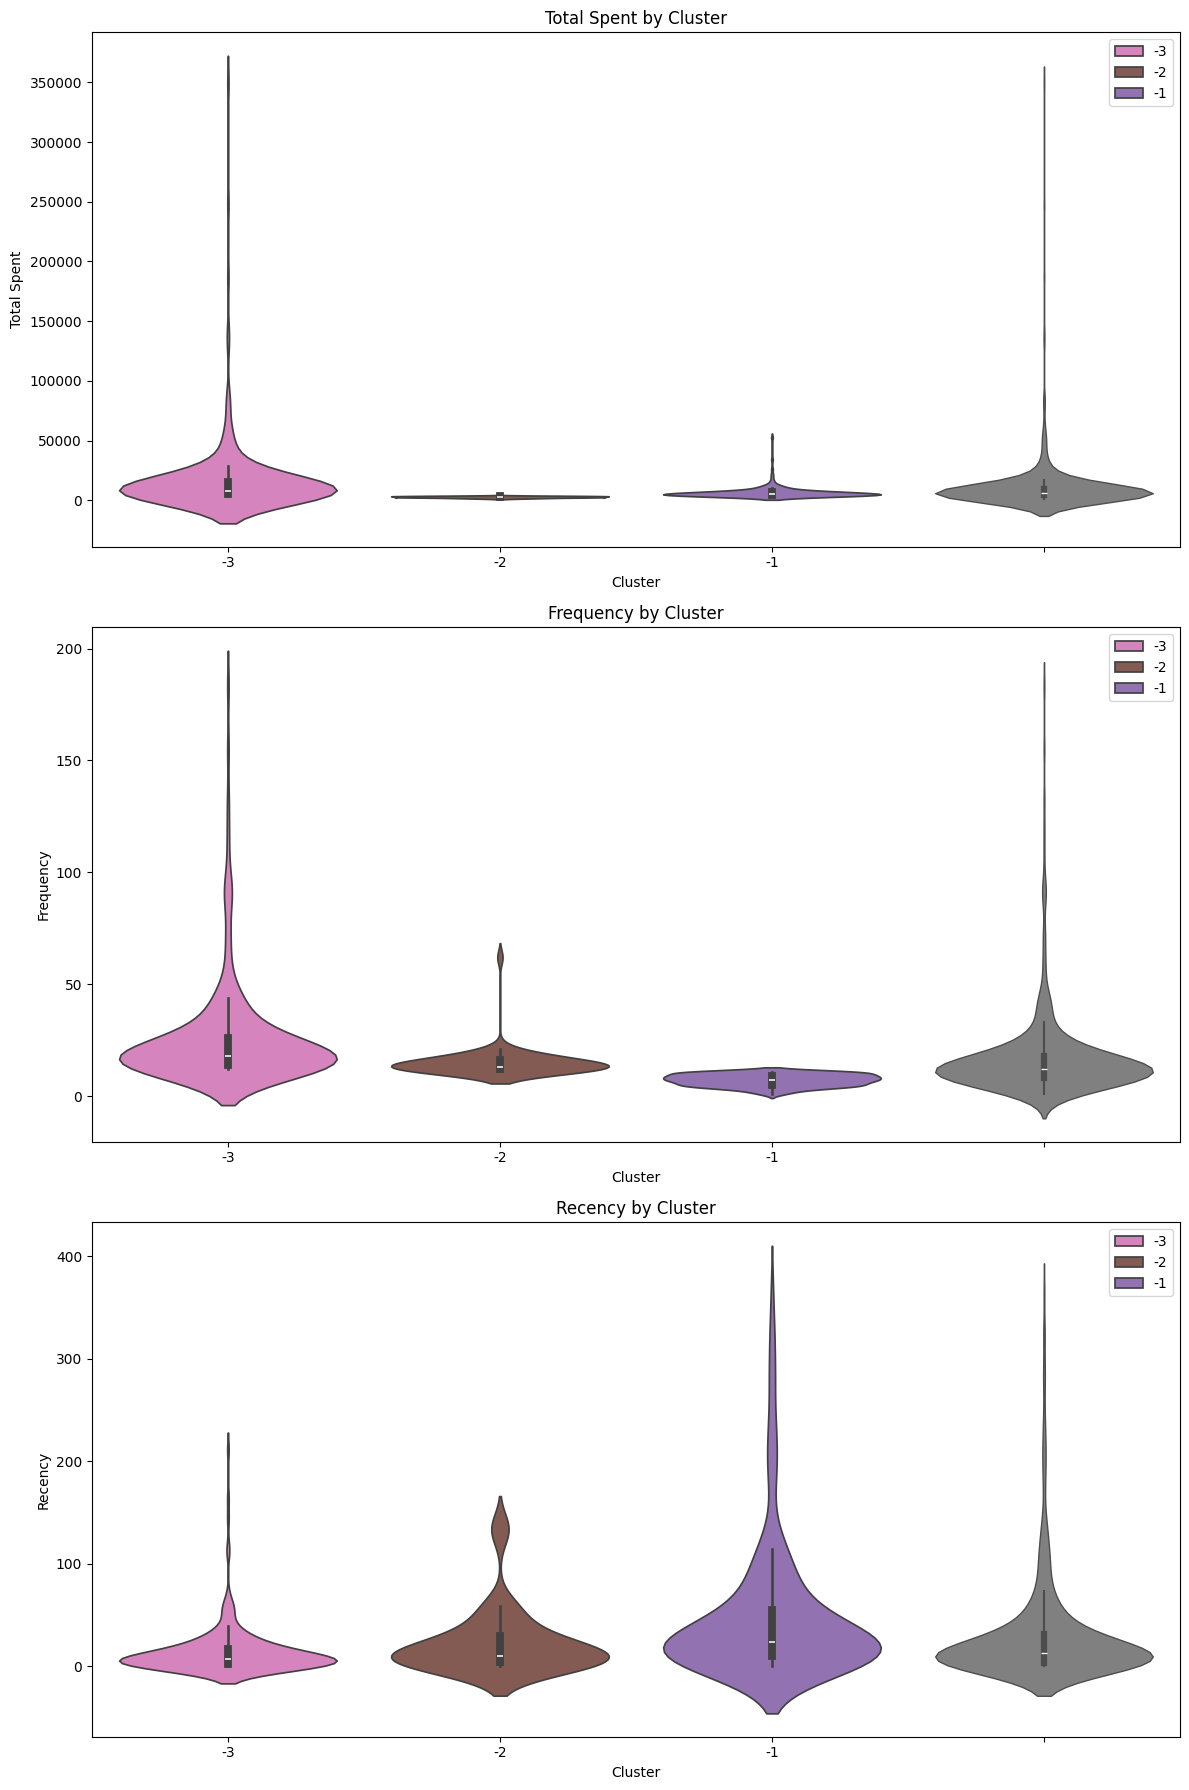

In [132]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Total_Spent'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Total_Spent'], color='gray', linewidth=1.0)
plt.title('Total Spent by Cluster')
plt.ylabel('Total Spent')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency(days)'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency(days)'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

# Conclusion - Outliers df Clusters

<p><b>Cluster -1 (Total Spent Outliers):</b> <br>
    High spenders but not necessarily frequent buyers. Their purchases are large but infrequent. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.
</p>

<p><b>Cluster -2 (Frequency Outliers):</b> <br>
   Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.
</p>

<p><b>Cluster -3 (Total Spent & Frequency Outliers Outliers):</b> <br>
   Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement
</p>
